In [1]:
import requests 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

In [2]:
smile_data = pd.read_csv('../data/SmileOn.csv', parse_dates=['SMILE ON 60+ Screening - Last Screening Date'], skiprows = 2,  usecols = ['CallerNum',
                                                                                                                                        'CountyName',
                                                                                                                                        'PostalCode',
                                                                                                                                        'Birth Year',
                                                                                                                                        'SMILE ON 60+ Screening - Last Screening Date',
                                                                                                                                        'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
                                                                                                                                        'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
                                                                                                                                        'SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
                                                                                                                                        'SMILE ON 60+ Site Information - Enroller ID',
                                                                                                                                        'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?',
                                                                                                                                        'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
                                                                                                                                        'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'])
smile_data.head()

C:\Users\jbtch\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallerNum,CountyName,PostalCode,Birth Year,SMILE ON 60+ Screening - Last Screening Date,SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,3859874,Robertson,37172.0,1957,NaN,Transportation; Dental cost; No insurance,NaN,Yes,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,Davidson,37212.0,1943,NaN,Dental cost; No insurance,NaN,Yes,NaN,NaN,NaN,NaN
2,2518680,Hawkins,37857.0,1957,NaN,Dental cost,5650 - Add tooth to existing partial denture - 30,Yes,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,Shelby,38104.0,1953,NaN,Transportation; Dental cost; No insurance,No Code - Denture step Mandibular: may be used...,Yes,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,-1,NaN,NaN,1953,11/25/2020,NaN,NaN,Yes,Neighborhood Health - Lebanon,NaN,Yes,No


In [3]:
# Renaming the column names

smile_data.columns = ['Caller ID',
                      'County Name',
                      'Zip Code',
                      'Birth Year',
                      'Last Screening Date',
                      'barriers from finding a dental provider',
                      'care provided',
                      'pre-qualify for SMILE ON 60+',
                      'Site Information - Enroller ID',
                      'Treatment plan Status',
                      'Treatment plan Developed?',
                      'Was the enrollee able to be restored to function']
                                        
smile_data.head(5)

,Caller ID,County Name,Zip Code,Birth Year,Last Screening Date,barriers from finding a dental provider,care provided,pre-qualify for SMILE ON 60+,Site Information - Enroller ID,Treatment plan Status,Treatment plan Developed?,Was the enrollee able to be restored to function
0,3859874,Robertson,37172.0,1957,NaN,Transportation; Dental cost; No insurance,NaN,Yes,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,Davidson,37212.0,1943,NaN,Dental cost; No insurance,NaN,Yes,NaN,NaN,NaN,NaN
2,2518680,Hawkins,37857.0,1957,NaN,Dental cost,5650 - Add tooth to existing partial denture - 30,Yes,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,Shelby,38104.0,1953,NaN,Transportation; Dental cost; No insurance,No Code - Denture step Mandibular: may be used...,Yes,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,-1,NaN,NaN,1953,11/25/2020,NaN,NaN,Yes,Neighborhood Health - Lebanon,NaN,Yes,No


In [4]:
smile_data.info

<bound method DataFrame.info of        Caller ID County Name  Zip Code Birth Year Last Screening Date  \
0        3859874   Robertson   37172.0       1957                 NaN   
1        3859755    Davidson   37212.0       1943                 NaN   
2        2518680     Hawkins   37857.0       1957                 NaN   
3        3231923      Shelby   38104.0       1953                 NaN   
4             -1         NaN       NaN       1953          11/25/2020   
...          ...         ...       ...        ...                 ...   
40027         -1         NaN       NaN       1900                 NaN   
40028    3239813      Shelby   38111.0       1958                 NaN   
40029    2631417    Sullivan   37664.0       1958          11/29/2018   
40030         -1         NaN       NaN       1900                 NaN   
40031         -1         NaN       NaN       1900                 NaN   

         barriers from finding a dental provider  \
0      Transportation; Dental cost; No 

In [5]:
#Round the Zip Code Column to a zero decimal

pd.set_option('precision', 0)
smile_data.head(2)

,Caller ID,County Name,Zip Code,Birth Year,Last Screening Date,barriers from finding a dental provider,care provided,pre-qualify for SMILE ON 60+,Site Information - Enroller ID,Treatment plan Status,Treatment plan Developed?,Was the enrollee able to be restored to function
0,3859874,Robertson,37172,1957,NaN,Transportation; Dental cost; No insurance,NaN,Yes,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,Davidson,37212,1943,NaN,Dental cost; No insurance,NaN,Yes,NaN,NaN,NaN,NaN


In [6]:
smile_data.isnull()

,Caller ID,County Name,Zip Code,Birth Year,Last Screening Date,barriers from finding a dental provider,care provided,pre-qualify for SMILE ON 60+,Site Information - Enroller ID,Treatment plan Status,Treatment plan Developed?,Was the enrollee able to be restored to function
0,False,False,False,False,True,False,True,False,False,True,True,True
1,False,False,False,False,True,False,True,False,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,True,True,True
4,False,True,True,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
40027,False,True,True,False,True,True,True,True,True,True,True,True
40028,False,False,False,False,True,False,True,False,False,True,True,True
40029,False,False,False,False,False,False,True,False,False,False,False,False
40030,False,True,True,False,True,True,False,True,False,True,True,True


In [7]:
smile_data['Caller ID'].value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: Caller ID, Length: 8708, dtype: int64

In [8]:
smile_data['Zip Code'].value_counts()

37130    1119
37013     966
37207     934
37211     787
37115     751
         ... 
37409       1
37406       1
37370       1
37320       1
30741       1
Name: Zip Code, Length: 479, dtype: int64

In [9]:
smile_data['County Name'].value_counts()

Davidson           9299
Shelby             7398
Rutherford         3837
Sullivan           2209
Bradley            1789
                   ... 
Walker                1
McNairy               1
Pulaski               1
Desoto                1
Winchester City       1
Name: County Name, Length: 104, dtype: int64

In [10]:
smile_data.head(10)

,Caller ID,County Name,Zip Code,Birth Year,Last Screening Date,barriers from finding a dental provider,care provided,pre-qualify for SMILE ON 60+,Site Information - Enroller ID,Treatment plan Status,Treatment plan Developed?,Was the enrollee able to be restored to function
0,3859874,Robertson,37172,1957,NaN,Transportation; Dental cost; No insurance,NaN,Yes,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,Davidson,37212,1943,NaN,Dental cost; No insurance,NaN,Yes,NaN,NaN,NaN,NaN
2,2518680,Hawkins,37857,1957,NaN,Dental cost,5650 - Add tooth to existing partial denture - 30,Yes,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,Shelby,38104,1953,NaN,Transportation; Dental cost; No insurance,No Code - Denture step Mandibular: may be used...,Yes,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,-1,NaN,NaN,1953,11/25/2020,NaN,NaN,Yes,Neighborhood Health - Lebanon,NaN,Yes,No
5,3605119,Sullivan,37664,1960,NaN,Dental cost,No Code - Denture step Mandibular: may be used...,Yes,Friends in Need Health Center - Kingsport,No,Yes,NaN
6,3859184,Wilson,37087,1953,NaN,Dental cost,NaN,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN
7,3746643,Hawkins,37642,1956,NaN,Dental cost,No Code - Denture step Mandibular: may be used...,Yes,Friends in Need Health Center - Kingsport,No,Yes,NaN
8,3859184,Wilson,37087,4725,NaN,Dental cost,NaN,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN
9,3858402,Shelby,38128,1955,11/24/2020,Dental cost; No insurance,140 - Limited Oral evaluation - problem focuse...,Yes,Christ Community Health Services- Raleigh,Yes,No,NaN


In [11]:
#Take out null values and '-1'caller in the "Caller ID" column

In [12]:
smile_data_mod = smile_data[smile_data['Caller ID'] > 0]
smile_data_mod

,Caller ID,County Name,Zip Code,Birth Year,Last Screening Date,barriers from finding a dental provider,care provided,pre-qualify for SMILE ON 60+,Site Information - Enroller ID,Treatment plan Status,Treatment plan Developed?,Was the enrollee able to be restored to function
0,3859874,Robertson,37172,1957,NaN,Transportation; Dental cost; No insurance,NaN,Yes,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,3859755,Davidson,37212,1943,NaN,Dental cost; No insurance,NaN,Yes,NaN,NaN,NaN,NaN
2,2518680,Hawkins,37857,1957,NaN,Dental cost,5650 - Add tooth to existing partial denture - 30,Yes,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,3231923,Shelby,38104,1953,NaN,Transportation; Dental cost; No insurance,No Code - Denture step Mandibular: may be used...,Yes,Christ Community Health Services- Frayser,NaN,NaN,NaN
5,3605119,Sullivan,37664,1960,NaN,Dental cost,No Code - Denture step Mandibular: may be used...,Yes,Friends in Need Health Center - Kingsport,No,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40011,2385621,Rutherford,37085,1957,NaN,Dental cost; No insurance,5222 - Partial denture - resin base - immediat...,Yes,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN
40021,2307186,Davidson,37201,4670,NaN,Transportation; Dental cost; No insurance; Per...,150 - Comprehensive Oral Evaluation -new or es...,Yes,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN
40026,2631417,Sullivan,37664,1958,11/29/2018,No insurance,NaN,Yes,Friends in Need Health Center - Kingsport,No,No,Yes
40028,3239813,Shelby,38111,1958,NaN,Dental cost; No insurance,NaN,Yes,Church Health Center - Memphis,NaN,NaN,NaN


In [13]:
#Look at the amount of callers that didn't qualify first hand but was admitted treatment

In [15]:
smile_data_mod['pre-qualify for SMILE ON 60+'].value_counts()

Yes    35336
No      1442
Name: pre-qualify for SMILE ON 60+, dtype: int64

In [16]:
smile_data_notqualified = smile_data_mod[smile_data_mod['pre-qualify for SMILE ON 60+'] == 'No']

In [17]:
smile_data_notqualified.head(3)

,Caller ID,County Name,Zip Code,Birth Year,Last Screening Date,barriers from finding a dental provider,care provided,pre-qualify for SMILE ON 60+,Site Information - Enroller ID,Treatment plan Status,Treatment plan Developed?,Was the enrollee able to be restored to function
60,3773902,Maury,38401,1945,NaN,Dental cost,NaN,No,NaN,NaN,NaN,NaN
92,2944886,Dekalb,37012,1938,NaN,NaN,NaN,No,Neighborhood Health - Lebanon,Yes,Yes,Yes
134,2767435,Rutherford,37130,1955,NaN,Dental cost; Fear,NaN,No,NaN,NaN,NaN,NaN


In [ ]:
#Look at the amount of callers that didn't qualify first hand but was admitted treatment and completed treatment as well

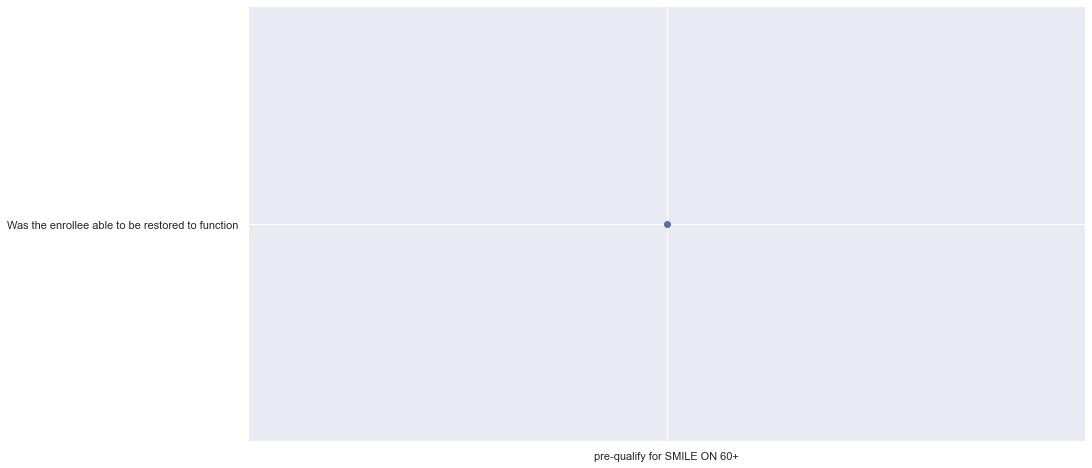

In [26]:
plt.scatter(x='pre-qualify for SMILE ON 60+', y='Was the enrollee able to be restored to function')